In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import os

In [37]:
base_curve = pd.read_csv('tess_curve_simulated.csv')
tess_flux = base_curve["flux_normalized"] #scale factor
#tess_flux_error =base_curve["flux_error_normalized"]*0.9961104871028598 
tess_time = base_curve["Days"]


In [38]:
base_curve

,Days,flux_normalized
0,0.000000,0.999991
1,0.013889,0.999999
2,0.027778,0.999993
3,0.041667,0.999907
4,0.055556,0.999562
...,...,...
139,1.930556,0.989686
140,1.944444,0.988235
141,1.958333,0.987081
142,1.972222,0.986251


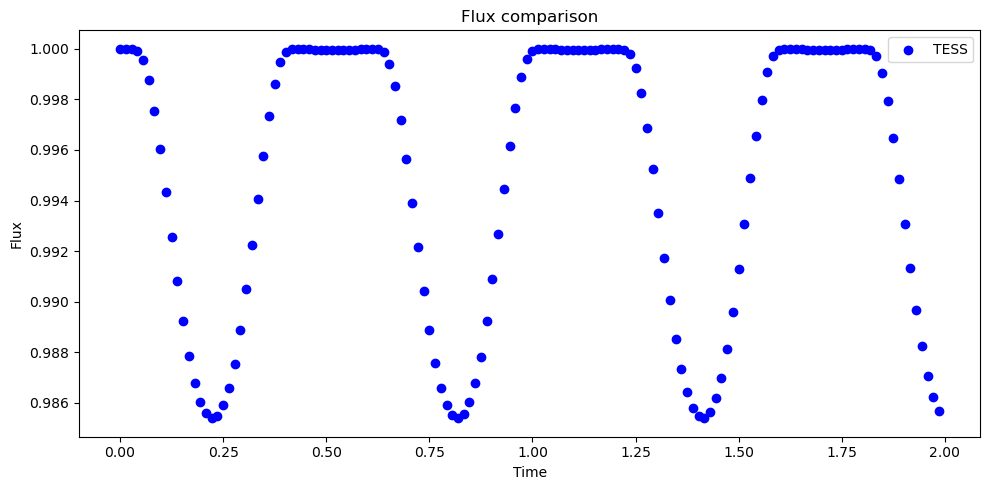

In [39]:
plt.figure(figsize=(10, 5))
plt.scatter(tess_time, tess_flux, label='TESS', color='blue', marker='o', linestyle='-')
#plt.plot(df2["Days"], df2["flux_normalized"], label='Simulated', color='red', marker='x', linestyle='--')
#plt.scatter(tess_time, simulated_flux, label='Simulated best parameters of mcmc', color='red', marker='o', linestyle='-')
#plt.scatter(tess_time, simulated_flux2, label='Simulated', color='green', marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("Flux comparison")
plt.legend()

plt.tight_layout()

plt.show()

In [40]:
flux_clean = tess_flux

# nivel de ruido (ej: 300 ppm)
sigma = 150e-5

# ruido gaussiano
noise = np.random.normal(0, sigma, size=len(flux_clean))

# curva observada falsa
flux_noisy = flux_clean + noise

# errores por punto (lo que usarás como Ferr)
Ferr = np.ones_like(flux_clean) * sigma

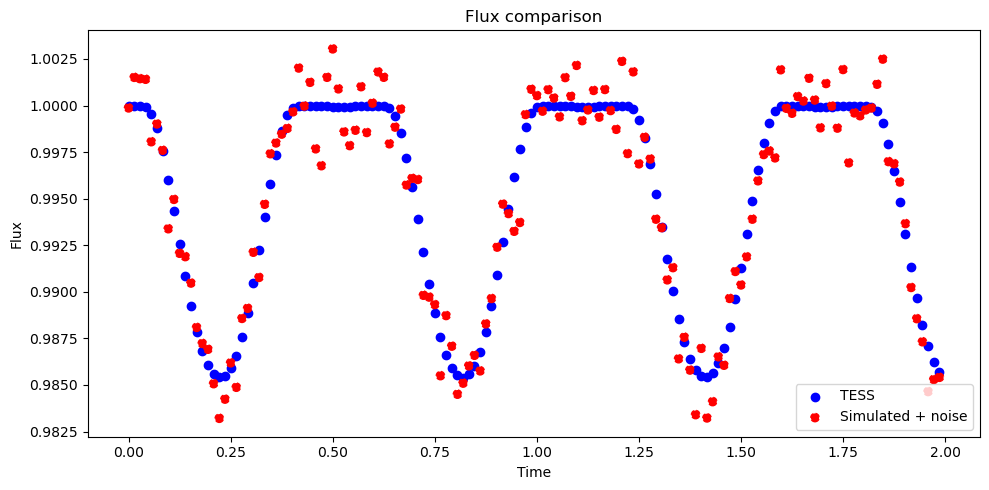

In [41]:
plt.figure(figsize=(10, 5))
plt.scatter(tess_time, tess_flux, label='Simulated', color='blue', marker='o', linestyle='-')
plt.scatter(tess_time, flux_noisy, label='Simulated + noise', color='red', marker='o', linestyle='--')
#plt.scatter(tess_time, simulated_flux, label='Simulated best parameters of mcmc', color='red', marker='o', linestyle='-')
#plt.scatter(tess_time, simulated_flux2, label='Simulated', color='green', marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("Flux comparison")
plt.legend()

plt.tight_layout()

plt.show()

In [33]:


df = pd.DataFrame({
    "time": tess_time,
    "flux": flux_noisy,
    "flux_err": Ferr
})

df.to_csv("tess_curve.csv", index=False)

In [34]:
base_curve = pd.read_csv('tess_curve.csv')
tess_flux = base_curve["flux"] #scale factor
tess_flux_error =base_curve["flux_err"] 
tess_time = base_curve["time"]
base_curve

,time,flux,flux_err
0,0.000000,0.998702,0.0015
1,0.013889,0.998758,0.0015
2,0.027778,0.999046,0.0015
3,0.041667,1.000188,0.0015
4,0.055556,0.997705,0.0015
...,...,...,...
139,1.930556,0.991771,0.0015
140,1.944444,0.985366,0.0015
141,1.958333,0.987906,0.0015
142,1.972222,0.985585,0.0015


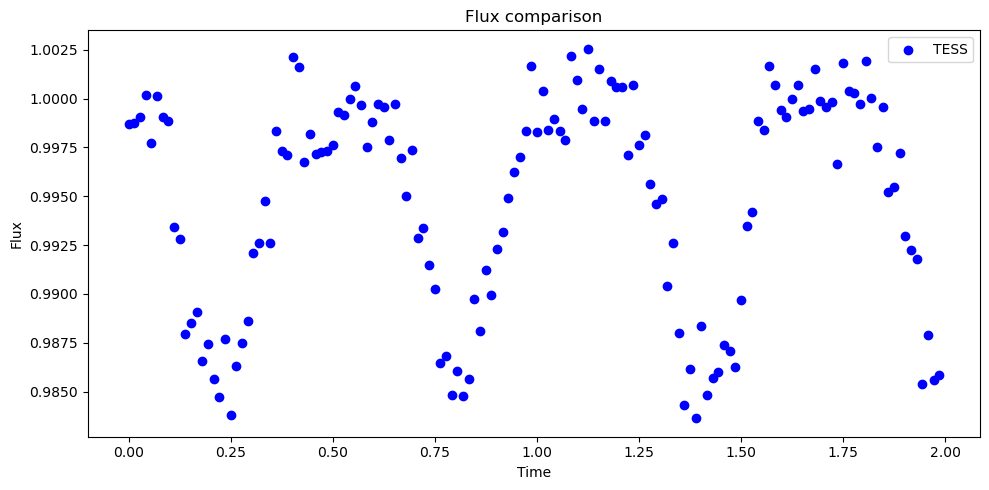

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import os
base_curve = pd.read_csv('tess_curve.csv')
tess_flux = base_curve["flux"] #scale factor
tess_flux_error =base_curve["flux_err"] 
tess_time = base_curve["time"]
base_curve
plt.figure(figsize=(10, 5))
plt.scatter(tess_time, tess_flux, label='TESS', color='blue', marker='o', linestyle='-')
#plt.plot(df2["Days"], df2["flux_normalized"], label='Simulated', color='red', marker='x', linestyle='--')
#plt.scatter(tess_time, simulated_flux, label='Simulated best parameters of mcmc', color='red', marker='o', linestyle='-')
#plt.scatter(tess_time, simulated_flux2, label='Simulated', color='green', marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("Flux comparison")
plt.legend()

plt.tight_layout()

plt.show()